In [1]:
#For Supress Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#import libaries
import nltk
import spacy
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
from nltk import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
from nltk.corpus import wordnet
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag, ne_chunk
from collections import Counter
from wordcloud import WordCloud

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [4]:
# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

In [5]:
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\girid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\girid\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\girid\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\girid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\girid\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [6]:
data = pd.read_csv('FinalBalancedDataset.csv')

In [7]:
data.head( )

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation


In [8]:
data.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56745 entries, 0 to 56744
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  56745 non-null  int64 
 1   Toxicity    56745 non-null  int64 
 2   tweet       56745 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.3+ MB


In [9]:
data = data.drop("Unnamed: 0", axis=1)

In [10]:
data.head(10)

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
5,0,[2/2] huge fan fare and big talking before the...
6,0,@user camping tomorrow @user @user @user @use...
7,0,the next school year is the year for exams.ð...
8,0,we won!!! love the land!!! #allin #cavs #champ...
9,0,@user @user welcome here ! i'm it's so #gr...


In [11]:
data.shape

(56745, 2)

In [22]:
import spacy
import pandas as pd
from tqdm import tqdm

In [23]:
# Function for batch processing tweets with spaCy
def batch_process_tweets(tweets, batch_size=1000):
    pos_tags_list = []
    ner_tags_list = []
    dep_trees_list = []
    
    # Process in batches
    for i in tqdm(range(0, len(tweets), batch_size)):
        batch_tweets = tweets[i:i + batch_size]
        docs = list(nlp.pipe(batch_tweets, batch_size=batch_size, n_process=-1))
        
        for doc in docs:
            pos_tags = [(token.text, token.pos_) for token in doc]
            ner_tags = [(ent.text, ent.label_) for ent in doc.ents]
            dep_trees = [(token.text, token.dep_, token.head.text) for token in doc]
            
            pos_tags_list.append(pos_tags)
            ner_tags_list.append(ner_tags)
            dep_trees_list.append(dep_trees)
    
    return pos_tags_list, ner_tags_list, dep_trees_list

In [24]:
# Main script execution
if __name__ == "__main__":
    # Load dataset
    dataset = pd.read_csv('FinalBalancedDataset.csv')

    # Extract tweets
    tweets = dataset['tweet'].tolist()

    # Process tweets in batches
    pos_tags_list, ner_tags_list, dep_trees_list = batch_process_tweets(tweets, batch_size=1000)

    # Create DataFrame for linguistic dataset
    linguistic_dataset = pd.DataFrame({
        'Tweet': tweets,
        'POS Tags': pos_tags_list,
        'NER Tags': ner_tags_list,
        'Dependency Trees': dep_trees_list
    })

    # Display the linguistic dataset
    print("\nLinguistic Dataset:")
    print(linguistic_dataset)

    # Optionally, save the linguistic dataset to a CSV file
    linguistic_dataset.to_csv('linguistic_tweets_dataset.csv', index=False)
    

100%|██████████| 57/57 [33:56<00:00, 35.73s/it]   



Linguistic Dataset:
                                                   Tweet  \
0       @user when a father is dysfunctional and is s...   
1      @user @user thanks for #lyft credit i can't us...   
2                                    bihday your majesty   
3      #model   i love u take with u all the time in ...   
4                 factsguide: society now    #motivation   
...                                                  ...   
56740  you's a muthaf***in lie &#8220;@LifeAsKing: @2...   
56741  you've gone and broke the wrong heart baby, an...   
56742  young buck wanna eat!!.. dat nigguh like I ain...   
56743              youu got wild bitches tellin you lies   
56744  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...   

                                                POS Tags  \
0      [( , SPACE), (@user, ADJ), (when, SCONJ), (a, ...   
1      [(@user, ADV), (@user, ADJ), (thanks, NOUN), (...   
2      [(  , SPACE), (bihday, NOUN), (your, PRON), (m...   
3      [(#, SYM), 

In [26]:
df = pd.read_csv("linguistic_tweets_dataset.csv")

In [27]:
df.head( )

,Tweet,POS Tags,NER Tags,Dependency Trees
0,@user when a father is dysfunctional and is s...,"[(' ', 'SPACE'), ('@user', 'ADJ'), ('when', 'S...",[],"[(' ', 'dep', '@user'), ('@user', 'ROOT', '@us..."
1,@user @user thanks for #lyft credit i can't us...,"[('@user', 'ADV'), ('@user', 'ADJ'), ('thanks'...","[('#', 'CARDINAL')]","[('@user', 'advmod', '@user'), ('@user', 'comp..."
2,bihday your majesty,"[(' ', 'SPACE'), ('bihday', 'NOUN'), ('your',...","[('bihday', 'DATE')]","[(' ', 'dep', 'bihday'), ('bihday', 'ROOT', '..."
3,#model i love u take with u all the time in ...,"[('#', 'SYM'), ('model', 'NOUN'), (' ', 'SPAC...","[('¦', 'PERSON'), ('¦', 'PERSON')]","[('#', 'nmod', 'model'), ('model', 'nsubj', 't..."
4,factsguide: society now #motivation,"[(' ', 'SPACE'), ('factsguide', 'NOUN'), (':',...",[],"[(' ', 'dep', 'factsguide'), ('factsguide', 'R..."


In [28]:
data['Toxicity'].value_counts()

Toxicity
0    32592
1    24153
Name: count, dtype: int64

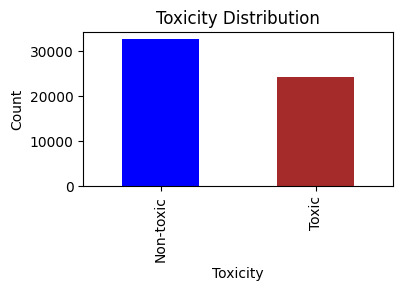

In [29]:
# Data
toxicity_counts = data['Toxicity'].value_counts()

# Plotting
plt.figure(figsize=(4, 2))
toxicity_counts.plot(kind='bar', color=['blue', 'Brown'])
plt.title('Toxicity Distribution')
plt.xlabel('Toxicity')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-toxic', 'Toxic'])  # Replace 0 and 1 with appropriate labels
plt.show()

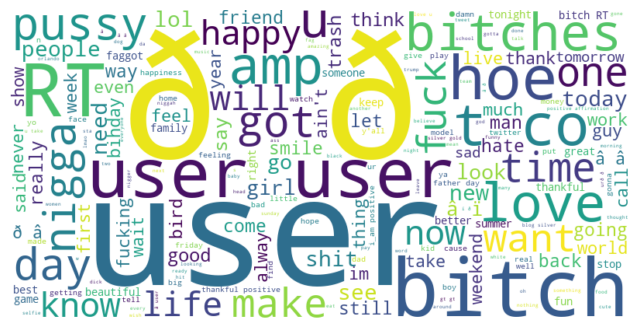

In [30]:
all_text = ' '.join(data['tweet'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Text pre-processing

In [31]:
wordnet_lemmatizer = WordNetLemmatizer()

In [32]:
def prepare_text(text):
    def get_wordnet_pos(treebank_tag):
        if treebank_tag.startswith('J'):
            return wordnet.ADJ
        elif treebank_tag.startswith('V'):
            return wordnet.VERB
        elif treebank_tag.startswith('N'):
            return wordnet.NOUN
        elif treebank_tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN
    text = re.sub(r'[^a-zA-Z\']', ' ', text)
    text = text.split()
    text = ' '.join(text)
    text = word_tokenize(text)
    text = pos_tag(text)
    lemma = []
    for i in text: lemma.append(wordnet_lemmatizer.lemmatize(i[0], pos = get_wordnet_pos(i[1])))
    lemma = ' '.join(lemma)
    return lemma

In [55]:
data['clean_tweets'] = data['tweet'].apply(lambda x: prepare_text(x))

In [34]:
data.head( )

,Toxicity,tweet,clean_tweets
0,0,@user when a father is dysfunctional and is s...,user when a father be dysfunctional and be so ...
1,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i ca n't use ...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ur
4,0,factsguide: society now #motivation,factsguide society now motivation


### TF-IDF for features

In [35]:
corpus = data['clean_tweets'].values.astype('U')

In [36]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load stopwords for English
stopwords_list = stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\girid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
# Initialize TfidfVectorizer with stop words
count_tf_idf = TfidfVectorizer(stop_words=stopwords_list)

In [40]:
# Fit and transform corpus
tf_idf = count_tf_idf.fit_transform(corpus)

In [41]:
import pickle

In [42]:
pickle.dump(count_tf_idf, open("tf_idf.pkt", "wb"))

In [43]:
tf_idf_train, tf_idf_test, target_train, target_test = train_test_split(
    tf_idf, data['Toxicity'], test_size = 0.8, random_state= 42, shuffle=True
)

### Create a Binary Classification Model

In [44]:
model_bayes = MultinomialNB()

In [45]:
model_bayes = model_bayes.fit(tf_idf_train, target_train)

In [46]:
y_pred_proba = model_bayes.predict_proba(tf_idf_test)[::, 1]

In [47]:
y_pred_proba

array([0.90152453, 0.27916787, 0.79021827, ..., 0.09487729, 0.20555162,
       0.32090192])

In [48]:
fpr, tpr, _ = roc_curve(target_test, y_pred_proba)

In [49]:
final_roc_auc = roc_auc_score(target_test, y_pred_proba)

In [50]:
final_roc_auc

0.9658691315317345

In [58]:
test_text = "I hate you Rashmika"
test_tfidf = count_tf_idf.transform([test_text])
display(model_bayes.predict_proba(test_tfidf))
display(model_bayes.predict(test_tfidf))

array([[0.45625894, 0.54374106]])

array([1], dtype=int64)

### Save the model

In [52]:
pickle.dump(model_bayes, open("toxicity_model.pkt", "wb"))